In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

### Read in loan data from 2007 to 2015. The data has been split into 21 different files so that they can pushed to Github

In [2]:
def read_loan_data():
    """Read in data from 21 files and concatentate into one dataframe"""
    dataframes = []
    for i in range(21):
        filename = './data/LoanStats_2007_to_2015_' + str(i) + '.csv'
        df = pd.read_csv(filename, low_memory=False)
        dataframes.append(df)
    loans = pd.concat(dataframes)
    return loans

In [3]:
loans = read_loan_data()

In [4]:
loans.shape

(887449, 143)

In [5]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
0,1077501,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Some exploratory data analysis

### What kind of interest rate are borrowers paying?

In [6]:
# Remove 9 loans with missing interest rates. These were never funded
loans = loans[loans.int_rate.notnull()]

In [7]:
# Strip out % and convert to float
loans.int_rate = loans.int_rate.apply(lambda x: float(x.rstrip('%')))

In [8]:
loans.int_rate.describe()

count    887440.000000
mean         13.245705
std           4.382385
min           5.320000
25%           9.990000
50%          12.990000
75%          16.200000
max          28.990000
Name: int_rate, dtype: float64

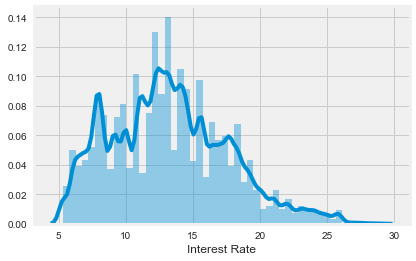

In [35]:
sns.distplot(loans.int_rate, axlabel='Interest Rate');

### How long are the loan terms?

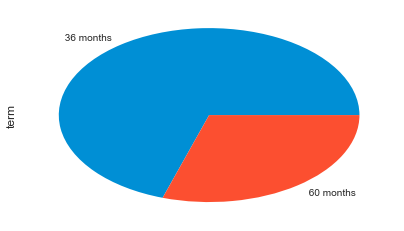

In [34]:
loans.term.value_counts().plot(kind='pie');

### How much are people borrowing?

In [11]:
loans.loan_amnt.describe()

count    887440.000000
mean      14755.167673
std        8435.379336
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

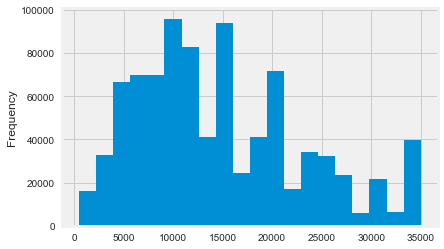

In [32]:
loans.loan_amnt.plot(kind='hist', bins=20, x='Loan Amount');

### What are people taking these loans out for?

In [17]:
purposes = loans.purpose.value_counts()
purposes

debt_consolidation    524253
credit_card           206194
home_improvement       51834
other                  42896
major_purchase         17277
small_business         10378
car                     8864
medical                 8541
moving                  5415
vacation                4736
house                   3707
wedding                 2347
renewable_energy         575
educational              423
Name: purpose, dtype: int64

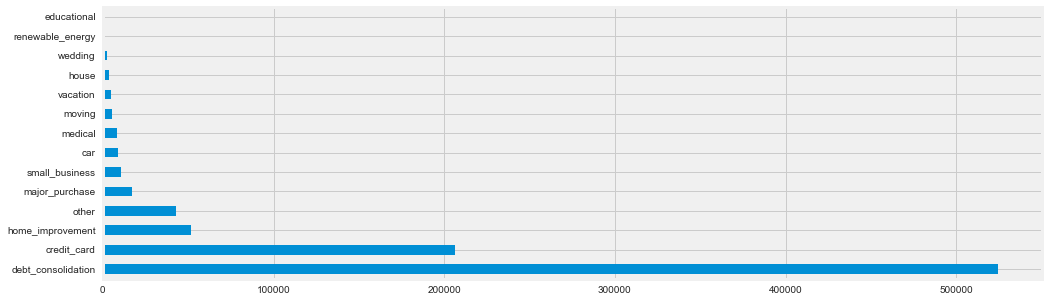

In [33]:
purposes.plot.barh(figsize=(15, 5));

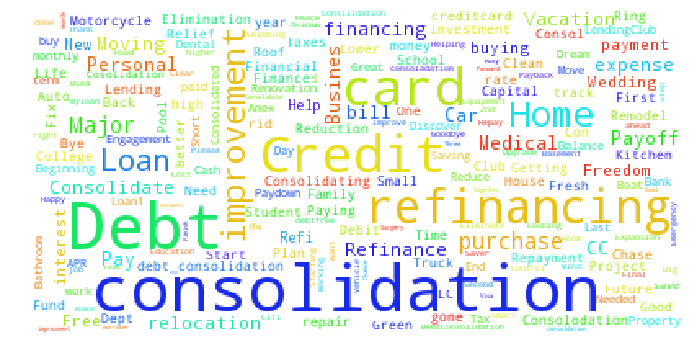

In [57]:
titles = loans.title.str.cat(sep=',')
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', max_font_size=40, relative_scaling=0.4)
wordcloud.generate(titles)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Lots of null values, drop columns where 80% or more of the values are null

In [ ]:
num_rows = loans.shape[0]
threshold = int(num_rows * 0.8)
loans = loans.dropna(axis=1, thresh=threshold)
loans.shape

In [ ]:
loans.loan_status.value_counts()

In [ ]:
null_value_count = loans.isnull().sum().sort_values(ascending=False)

In [ ]:
cutoff = 887449 * 0.8;
columns_to_remove = []
for column, null_values in null_value_count.iteritems():
    if null_values > cutoff:
        columns_to_remove.append(column)
        print column, null_values

In [ ]:
loans.desc.head()

In [ ]:
loans.url.head()

In [ ]:
loans.title.head(100)

In [ ]:
df = loans.dropna(axis=1, thresh=cutoff)
df.shape

In [ ]:
df.columns

In [ ]:
loans.application_type.value_counts()